FEniCS tutorial demo program: Heat equation with Dirichlet conditions.<br>
Test problem is chosen to give an exact solution at all nodes of the mesh.<br>

  $\dot{u}= \nabla^2u$  in the unit square<br>
  $u = 0$             on the boundary<br>
  $u = 10\sin(\pi x)$             at t = 0<br>

In [3]:
from __future__ import print_function
from fenics import *
import numpy as np
import matplotlib.pyplot as plt

T = 2.0            # final time
num_steps = 1      # number of time steps
dt = T / num_steps # time step size
alpha = 3          # parameter alpha
beta = 1.2         # parameter beta

In [4]:
# Create mesh and define function space
mesh = Mesh("meshes/average.xml")
V = FunctionSpace(mesh, 'Lagrange', 1)

In [2]:
boundary = BoundaryMesh(mesh, 'exterior')

NameError: name 'BoundaryMesh' is not defined

In [10]:
# Plot mesh
%matplotlib widget
plot(mesh)

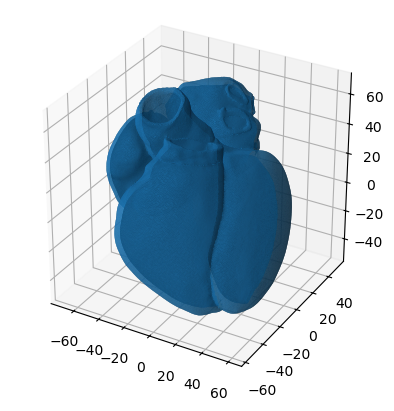

In [5]:
plot(mesh)

In [ ]:
# Define boundary condition
u_D = Expression('sin(3.1415*x[0])*sin(3.1415*x[1])', degree=2, t=0)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

In [ ]:
# Define initial value
u_n = interpolate(u_D, V)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)

F = u*v*dx + dt*dot(grad(u), grad(v))*dx - u_n*v*dx
a, L = lhs(F), rhs(F)

In [ ]:
# Time-stepping
u = Function(V)
t = 0

p = plot(u_n, title='Initial temperature distribution')
plt.colorbar(p)

for n in range(num_steps):

    # Update current time
    t += dt
    u_D.t = t

    # Compute solution
    solve(a == L, u, bc)

    # Update previous solution
    u_n.assign(u)

p_n = plot(u, title='Final temperature distribution')
plt.colorbar(p_n)